In [1]:
# python version: python3

## DATA PREPARATION

### part a

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("training.csv") #data from a csv file
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0,15985.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,7349.0
2,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,54.5,...,NaN,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,6849.0
3,gas,std,four,sedan,rwd,front,104.5,187.8,66.5,54.1,...,171.0,mpfi,3.27,3.35,9.2,156.0,5200.0,20.0,24.0,15690.0
4,gas,std,four,sedan,fwd,front,93.7,167.3,NaN,50.8,...,90.0,2bbl,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,6692.0


In [2]:
train_x_a = df.drop('price',1) #input feature
train_y = df['price'] #target label

In [3]:
train_x_a.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
2,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,54.5,...,four,NaN,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
3,gas,std,four,sedan,rwd,front,104.5,187.8,66.5,54.1,...,six,171.0,mpfi,3.27,3.35,9.2,156.0,5200.0,20.0,24.0
4,gas,std,four,sedan,fwd,front,93.7,167.3,NaN,50.8,...,four,90.0,2bbl,2.97,3.23,9.4,68.0,5500.0,31.0,38.0


In [4]:
train_y.head(2)

0    15985.0
1     7349.0
Name: price, dtype: float64

In [5]:
train_y = train_y.fillna(train_y.median()) #null values replaced by median

### part b

In [6]:
null_values = train_x_a.columns[train_x_a.isnull().any()] #features containing null values
nan_columns = [null_values]

train_x_a = train_x_a.fillna(train_x_a.median())
train_x_b = pd.DataFrame(train_x_a, columns = train_x_a.columns, index = train_x_a.index) # put transformed features to dataframe.

In [7]:
print(nan_columns)

[Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')]


In [8]:
train_x_b.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.20,56.2,...,four,141.0,mpfi,3.31,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.80,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
2,gas,std,four,sedan,fwd,front,94.5,165.3,63.80,54.5,...,four,110.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
3,gas,std,four,sedan,rwd,front,104.5,187.8,66.50,54.1,...,six,171.0,mpfi,3.27,3.35,9.2,156.0,5200.0,20.0,24.0
4,gas,std,four,sedan,fwd,front,93.7,167.3,65.45,50.8,...,four,90.0,2bbl,2.97,3.23,9.4,68.0,5500.0,31.0,38.0


In [10]:
train_x_b.dtypes #to see the columns that has the variables as object

fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber       object
enginesize          float64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
highwaympg          float64
dtype: object

### part c

In [11]:
categories = train_x_b.select_dtypes(include = ['object']).columns
#new dataframe with that categorical values under the name of categories.

In [12]:
categorical_columns = categories.tolist()

In [13]:
print(categorical_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### part d

In [14]:
train_x_d = pd.get_dummies(train_x_b, categorical_columns) 
#dummy variables; 1 if it includes that variables, 0 if it does not

In [15]:
train_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,104.3,188.8,67.2,56.2,2410.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,0,0,0,1,0,0
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0,0,0,1,0,0,0,0,0,0


### part e

In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() #scaler to scale columns with standardization
scaled_feature = std_scaler.fit_transform(train_x_d)
train_x_e = pd.DataFrame(data = scaled_feature, columns = train_x_d.columns, index = train_x_d.index) #converted to dataframe with scaled features


In [19]:
train_x_e = train_x_e.fillna(train_x_e.median()) #null values replaced by median

In [20]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.077482,1.246116,0.716119,1.116293,-0.214330,0.427905,0.001216,-0.294661,-0.123041,0.315845,...,-0.078326,-0.111111,-0.240966,-0.720082,-0.111111,-0.317287,-0.078326,1.144491,-0.240966,-0.078326
1,-0.717242,-0.267323,-1.016989,-0.065099,-0.988096,-0.690444,-0.637071,0.143514,-0.149620,-0.910319,...,-0.078326,-0.111111,-0.240966,1.388730,-0.111111,-0.317287,-0.078326,-0.873751,-0.240966,-0.078326


## Data Exploration

### part f

In [21]:
import matplotlib.pyplot as plt

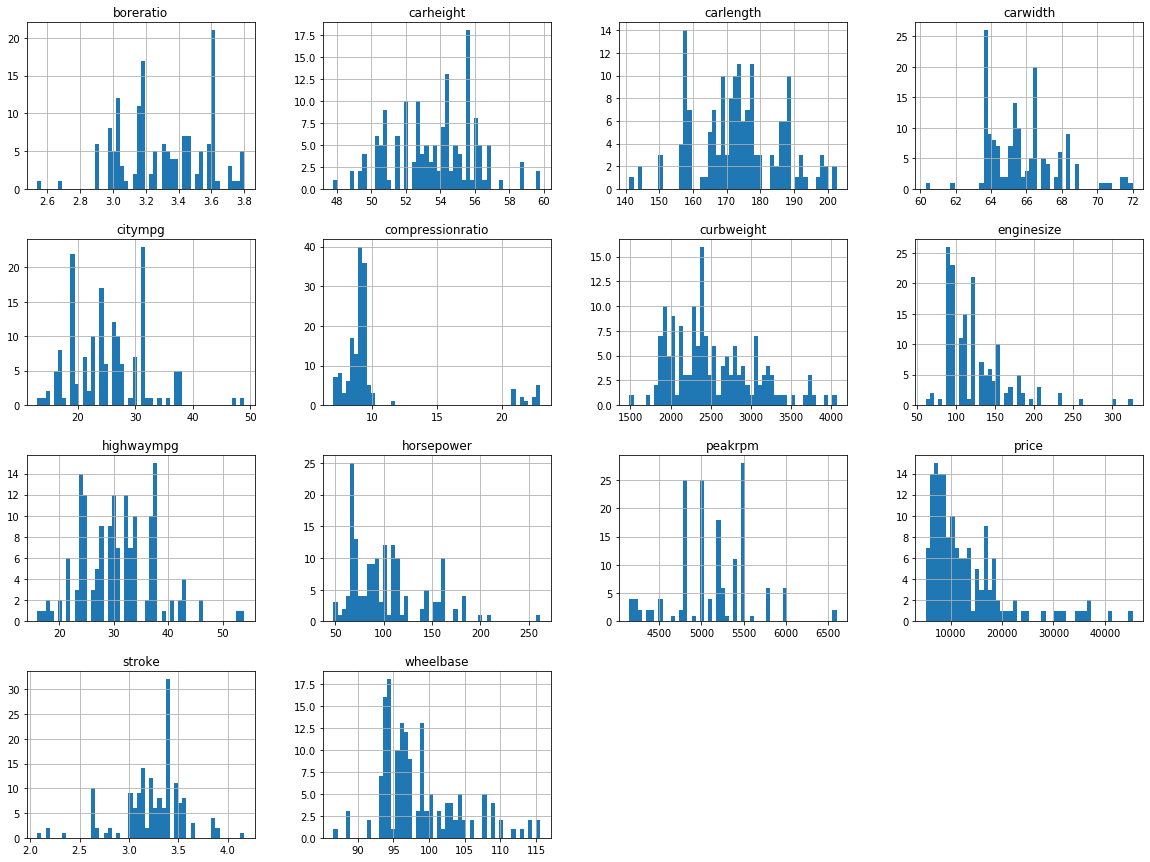

In [22]:
%matplotlib inline
df.hist(bins = 50, figsize = (20,15))
plt.show()

#some variables have extreme points in their distributions such as; carwidth(in 64), horsepower(in ~60), stroke (in ~3,4)

### part g

In [23]:
correlation = df.corr() #take the correlation
corr = correlation['price'].sort_values(ascending = False)[:5] 
top_5_corr = [corr]
#calculates the correlation between all continues variables and target label.

In [24]:
print(top_5_corr) #top-5 correlation scores calculated above

[price         1.000000
enginesize    0.873498
curbweight    0.843303
carwidth      0.812180
horsepower    0.801589
Name: price, dtype: float64]


### part h

In [25]:
from pandas.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBA66C0CC8>,
      dtype=object)

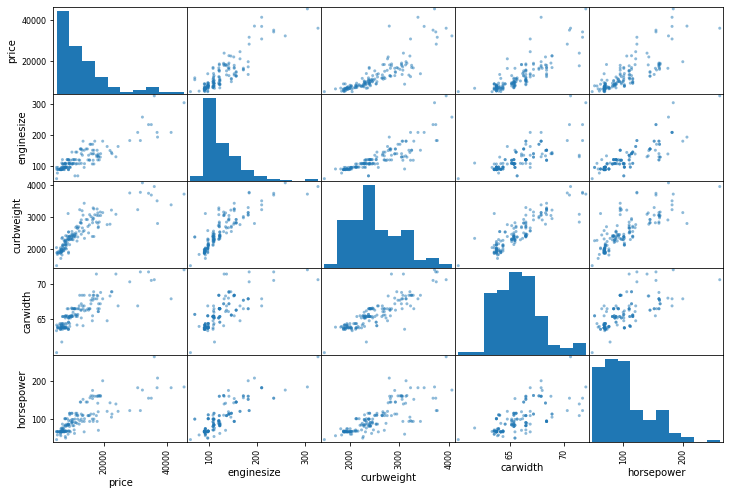

In [26]:
attributes = ['price', 'enginesize', 'curbweight', 'carwidth', 'horsepower']
scatter_matrix(df[attributes], figsize = (12,8))
#plotes the scatter matrix of the top 5 correlated variables that calculated above.

## LINEAR REGRESSION TO PREDICT CAR PRICES

### part i

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [28]:
linear_reg = LinearRegression()
linear_reg.fit(train_x_e, train_y) #fit the linear regression model.
prediction = linear_reg.predict(train_x_e) #predicted the training set using linear regression model
mse = mean_squared_error(train_y, prediction) #calculated the M.S.E. by using differences between label and prediction
mse

4551507.110464826

### part j

In [29]:
#5-fold cross validation with training data
score = cross_val_score(linear_reg, train_x_e, train_y, scoring="neg_mean_squared_error", cv=5) 
train_mse_score = np.sqrt(-score)
print(train_mse_score)

[3312.98696653 2652.36480617 3012.66310967 3401.65793602 2973.46344867]


In [30]:
average_mse = train_mse_score.mean() #take the avarage(mean) of the mean squared error.
print(average_mse)

3070.6272534116097


### part k

In [31]:
df_test = pd.read_csv("test.csv") #data read from a csv file for testing part.

In [32]:
test_x = df_test.drop('price', 1) 
test_y = df_test['price']

test_x = test_x.fillna(train_x_a.median()) #same with the one applied to the training set
test_y = test_y.fillna(train_y.median())

In [33]:
test_x.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,...,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
1,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,...,four,110.0,1bbl,3.15,3.58,9.0,86.0,5200.0,27.0,33.0


In [34]:
test_y.head(2)

0    18920.0
1    10295.0
Name: price, dtype: float64

In [38]:
category = test_x.select_dtypes(include= 'object').columns #take the string variables from dataset.
cat_column=category.tolist()

test_x = pd.get_dummies(test_x, cat_column) #convert the categorical variables to dummy variables(numeric (1 and 0))

scaled_feature = std_scaler.fit_transform(test_x) #apply standard scaler method to dummied variables.
test_x = pd.DataFrame(data = scaled_feature, columns = test_x.columns, index = test_x.index)
test_x.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,0.969444,1.356167,2.103204,0.603545,0.492092,-0.011160,-0.665809,0.357817,-0.495670,0.072515,...,-0.280976,-0.226455,-0.226455,-0.226455,-0.492366,-0.158114,-0.372678,-0.226455,0.975900,-0.226455
1,-0.475062,-0.074637,-1.475528,-0.046579,-0.624520,-0.551899,-0.809863,1.005044,-0.375703,-0.456036,...,-0.280976,-0.226455,-0.226455,4.415880,-0.492366,-0.158114,-0.372678,-0.226455,-1.024695,-0.226455
2,1.109235,0.926099,1.660889,0.278483,1.530042,0.966331,0.738714,1.220786,2.623483,0.358813,...,-0.280976,-0.226455,-0.226455,-0.226455,-0.492366,-0.158114,2.683282,-0.226455,-1.024695,-0.226455
3,2.087772,1.926834,1.379416,-0.574805,2.625549,2.526157,0.918781,3.126510,-0.591644,1.526027,...,-0.280976,-0.226455,-0.226455,-0.226455,-0.492366,-0.158114,-0.372678,-0.226455,0.975900,-0.226455
4,-1.562325,-0.612222,-0.470266,-1.062398,0.112213,1.195105,1.314929,-1.440036,-0.255735,2.208738,...,-0.280976,-0.226455,-0.226455,-0.226455,-0.492366,-0.158114,-0.372678,-0.226455,0.975900,-0.226455


### part l

In [40]:
linear_reg.fit(test_x, test_y) #fit linear regression model to test data.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
predicted_values = linear_reg.predict(test_x) #predicted prices of cars using linear regression

In [42]:
print(predicted_values[10:13])

[10628.0147807  16083.63772148  7296.34749782]


In [43]:
linear_reg.coef_ #model's coefficients

array([  1045.87592581,   -641.35673241,   5059.14216135,   -911.34883039,
          507.38338828,  -7035.05197245,   4930.62293902,  -2457.58645102,
       -54026.07274691,   5744.32068148,   1699.00188018,   1167.76803681,
       -10114.75576326,  19943.69742535, -19943.69742535,   2756.25076338,
        -2756.25076338,   1098.3712057 ,  -1098.3712057 ,   1944.64490931,
         2475.30504592,  -1668.3393898 ,    507.76597736,  -1617.64983826,
        -1043.9590426 ,   1627.20993172,  -1165.65542537,  -2451.91815656,
         2451.91815656,   -662.31194967,  -1765.50979151,   6571.9043025 ,
        -4408.20116101,  -5211.00892814,    701.31832228,   4978.55087231,
        -5476.22942529,  -2472.83956911,   5416.19041805,   -751.11554962,
         -951.23796003,    701.31832228,  -1923.35194503,   -971.73079642,
        -3024.80886456,  19943.69742535,  -3590.06665942,  -9268.26390634,
          677.39958658])

In [45]:
test_mse_score = mean_squared_error(test_y, predicted_values) #calculate the mean squared error for test data.
print(test_mse_score)

200900.20449342788


### part m

In [46]:
from sklearn.preprocessing import PolynomialFeatures
pol_feature = PolynomialFeatures(degree=2, include_bias=False)
#run polynomial transformation for features which have polynomial relation with the target

In [47]:
train_x_m = pol_feature.fit_transform(train_x_e)

In [48]:
train_x_m[2]

array([-0.71724208, -0.66602412, -1.01698863, ...,  0.05806452,
        0.0188739 ,  0.00613497])

In [51]:
lr_model_poly = linear_reg.fit(train_x_m, train_y) #apply linear regression model to polynomial feature.
predict_poly = lr_model_poly.predict(train_x_m) #predict the polynomial features.
score = cross_val_score(lr_model_poly, train_x_m, train_y, scoring="neg_mean_squared_error", cv=5) #calculate the CV score of fitted linear model.
score

array([-4.49339552e+07, -2.81382399e+26, -4.86635991e+29, -1.31950855e+30,
       -9.12429261e+27])

In [52]:
average_mse = mean_squared_error(train_y, predict_poly).mean() #take the avarage mean squared error of predicted polynomial features
print(average_mse)

3361.682834423752


### part n

In [54]:
from sklearn.linear_model import Lasso, Ridge

In [56]:
lasso_reg = Lasso() #lasso regularization model with no parameters given
lasso_reg.fit(train_x_m, train_y)
lasso=cross_val_score(lasso_reg, train_x_m, train_y, scoring="neg_mean_squared_error", cv=5)
#apply the CV to lasso_reg with 5 fold.

C:\Users\saim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14572061.00711339, tolerance: 927006.1504304695
  positive)
C:\Users\saim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5600653.07906273, tolerance: 687532.7987363738
  positive)
C:\Users\saim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10800354.383013105, tolerance: 757849.18775
  positive)
C:\Users\saim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10391701.

In [58]:
pred_lasso = lasso_reg.predict(train_x_m) #predict the features that fitted with lasso regression.
average_mse = mean_squared_error(train_y, pred_lasso).mean()#calculates the avarage mse.
print(average_mse)

66179.19814455174


### part o

In [86]:
all_scores = []
ridge_dict = {}
for i in range(1, 3000, 10): #for alpha values between 1 and 3000 with a step size of 10
    ridge_reg = Ridge(alpha=i) #create ridge regression model.
    ridge_reg.fit(train_x_m, train_y) #fit the ridge reg model to the train_x_m features and label in train dataset.
    ridge_mse = mean_squared_error(y_true=train_y, y_pred=ridge_reg.predict(train_x_m)) #mean squared error
    all_scores.append(cross_val_score(ridge_reg, train_x_m, train_y, scoring="neg_mean_squared_error", cv=5)) #5-fold C.V.
    #kept ridge containing alpha values as values while keeping errors as keys in a dictionary
    if ridge_mse in ridge_dict.keys() and ridge_dict[ridge_mse] is not None: #if key is already defined, avoid override
        ridge_dict[ridge_mse].append(ridge_reg)
    else: #if not, just store it in a list for upcoming values which may share the same key
        ridge_dict[ridge_mse] = [ridge_reg]

In [87]:
min_error = min(ridge_dict.keys())
print("Minimum error is {}".format(min_error)) #minimum error between all keys that are errors as stated above
for ridge in ridge_dict[min_error]:
    print("Alpha with minimum error is {}".format(ridge.alpha)) #alpha value of ridges related to that key

Minimum error is 109917.4371243917
Alpha with minimum error is 1


In [88]:
all_scores

[array([-13373733.29439925, -37678848.06009965,  -8532458.3928707 ,
        -59847545.82900422, -13674943.44627884]),
 array([-14243314.26357289, -23214761.70047043,  -6276064.02480024,
        -28658732.42546749, -22360265.39792608]),
 array([-14578727.71487174, -20636091.71360553,  -5696394.90106118,
        -24586983.3424317 , -22926885.81442798]),
 array([-14713379.80372674, -19307356.30578311,  -5274818.54890341,
        -22935283.50281145, -23030199.81147214]),
 array([-14771279.62669248, -18443765.29023764,  -4945919.53566304,
        -22061667.47889535, -23119995.9088727 ]),
 array([-14792973.49345395, -17818505.78041647,  -4679290.54852652,
        -21533831.22160977, -23240143.05761234]),
 array([-14796100.78637891, -17337096.88810473,  -4457331.51008743,
        -21189373.76748266, -23386147.65502628]),
 array([-14789533.38693737, -16951689.51764873,  -4268914.77106201,
        -20953960.30476506, -23548874.36065265]),
 array([-14778138.90364599, -16634835.03970338,  -410657

In [89]:
# TODO: couldn't *plot line graph of all_scores* since they are arrays

In [90]:
print(f"Minimum error was {round(min_error, 2)} at alpha {min_alpha}")

Minimum error was 109917.44 at alpha 1


### part p

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [92]:
svr_estimator = SVR() #create a support vector regression model

In [93]:
grid = [
  {'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0], 'kernel': ['linear']},
  {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0], 'kernel': ['rbf']},
 ]
# given parameters to search

In [94]:
grid_search = GridSearchCV(estimator=svr_estimator, param_grid=grid, cv=5) #create a grid search model with 5 fold CV.
grid_search.fit(train_x_e, train_y) #fit that model with training data

C:\Users\saim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0,
                                3000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
best_mse = grid_search.best_score_ #best mean squared error score
best_parameters = grid_search.best_params_ #best hyperparameters
print(best_mse, best_parameters)

0.7993028156725883 {'C': 1000.0, 'kernel': 'linear'}
